### <span style = 'color:green'> Create a machine learning model that can predict the class of pulsar star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth, and they are called "pulsar" because the emission was pulsed.
- Each pulse is found to be made up of radio waves of different frequencies just as white light is made up of all the colours of the spectrum. It is observed that the highest frequencies of a pulse arrive at a telescope slightly before the lower frequencies. The reason for this is that the pulse has been travelling through the interstellar medium (the space between the pulsar and the Earth) and the different frequencies making up the pulse travel at different speeds through this medium. This is referred to as the pulse dispersion and is due to the free electrons in the interstellar medium.
- Pulsars are a subset of neutron stars that emit beams of electromagnetic radiation from their magnetic poles. As they rotate rapidly, these beams sweep across space like a lighthouse, causing periodic pulses of radiation that can be observed from Earth. These pulses can occur with remarkable regularity, sometimes as precise as milliseconds.
- They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.
- Each candidate is described by 8 continuous variables, and a single class variable.
- **Integrated Profile** :This integrated profile represents the combined effect of the pulsar's rotation, its magnetic field orientation, and any irregularities in the emission process. Scientists study these profiles to understand the characteristics of the neutron star, such as its rotation period, magnetic field strength, and emission properties.
- **DM-SNR Curve** : The DM-SNR (Dispersion Measure - Signal-to-Noise Ratio) curve is a plot used in pulsar astronomy to visualize and analyze pulsar signals,The DM-SNR curve is created by plotting the signal-to-noise ratio of a detected pulsar signal against its dispersion measure. 
- **Target** : Here the legitimate pulsar examples are a minority positive class i.e 1 , and spurious examples the majority negative class i.e 0 . The data set shared here contains spurious examples caused by RFI and/or noise, and real pulsar examples.


**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
Pulsar=pd.read_csv('SVM.csv')

In [3]:
Pulsar

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
17895,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN


In [4]:
Pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
Pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [6]:
Pulsar['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

**Observation after first look on the dataset :**
- Some technical information related to Pulsar, for more information regarding these information we can consult a domain expert.
- 8 Features related to each class of Pulsar ,and we have 2 class of Pulsar denoted by 0 and 1.
- Target Class is imbalanced.
- Missing Values in some of the columns.
- Target is an indicator variable: 
    - 0 indicates that the candidate is not a Pulsar star.(Majority)
    - 1 indicates it is a Pulsar star.


In [7]:
# Renaming Columns to shorter names 
new_column_names = {
    ' Mean of the integrated profile': 'Mean_IP',
    ' Standard deviation of the integrated profile': 'Std_IP',
    ' Excess kurtosis of the integrated profile': 'Kurtosis_IP',
    ' Skewness of the integrated profile': 'Skewness_IP',
    ' Mean of the DM-SNR curve': 'Mean_DMSNR',
    ' Standard deviation of the DM-SNR curve': 'Std_DMSNR',
    ' Excess kurtosis of the DM-SNR curve': 'Kurtosis_DMSNR',
    ' Skewness of the DM-SNR curve': 'Skewness_DMSNR',
    'target_class': 'Target'
}
df= Pulsar.rename(columns=new_column_names)


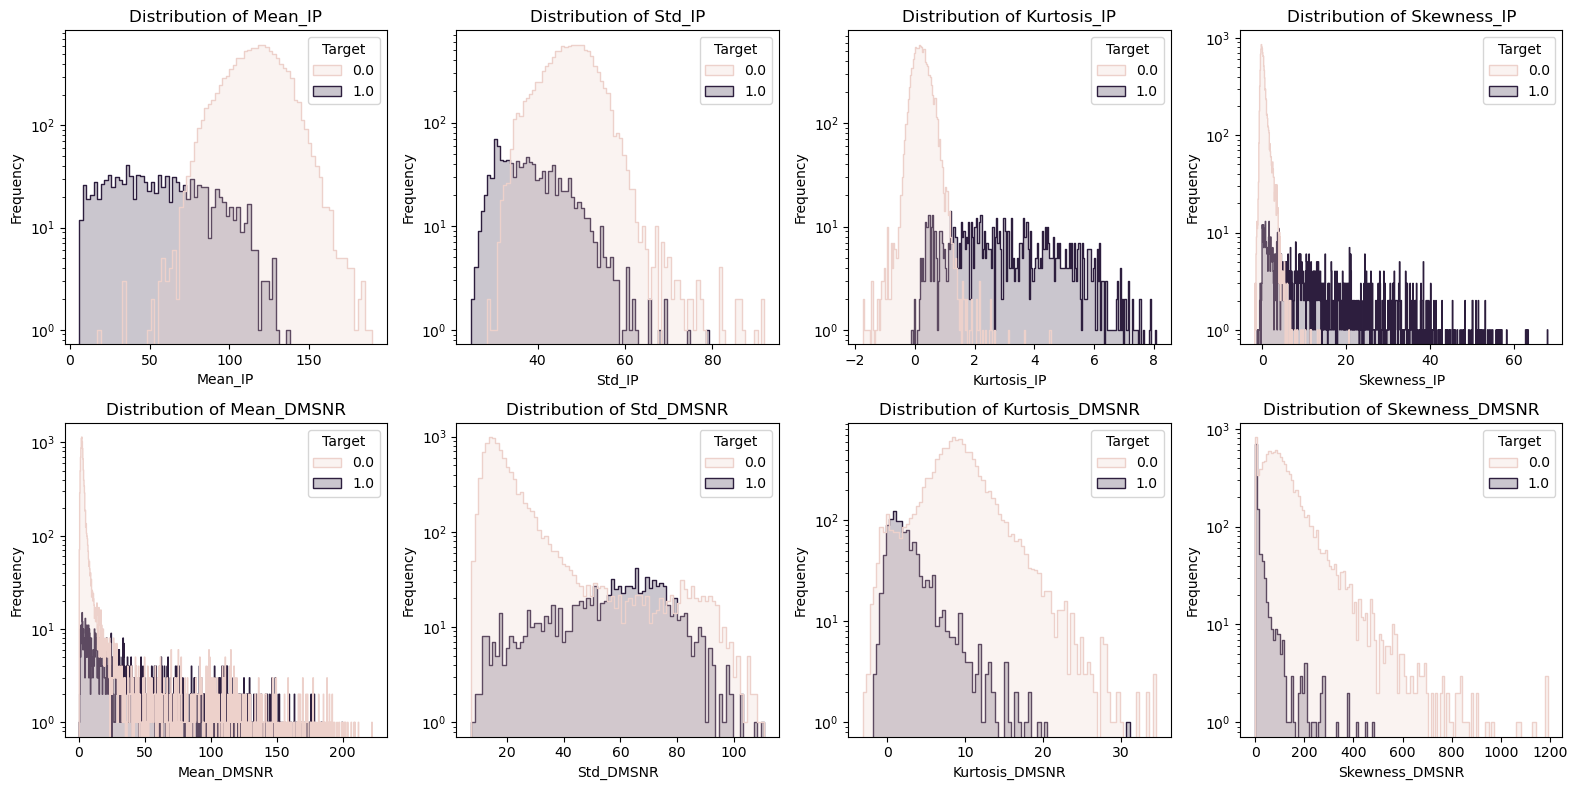

In [8]:
#Plotting Distribution Plot for all features
columns = [col for col in df.columns if col != 'Target']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Plotting each column
for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    sns.histplot(data=df,x=column,hue='Target',ax=axes[row, col],element='step')
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_yscale('log')
    

plt.tight_layout()
plt.show()


**Observation :**
- Some features such as Mean of the Integrated Profile ,Kurtosis of the Integrated Profile and Skewness of Integrated Profile able to distinguish between the Pulsar and Non-Pulsar Star.

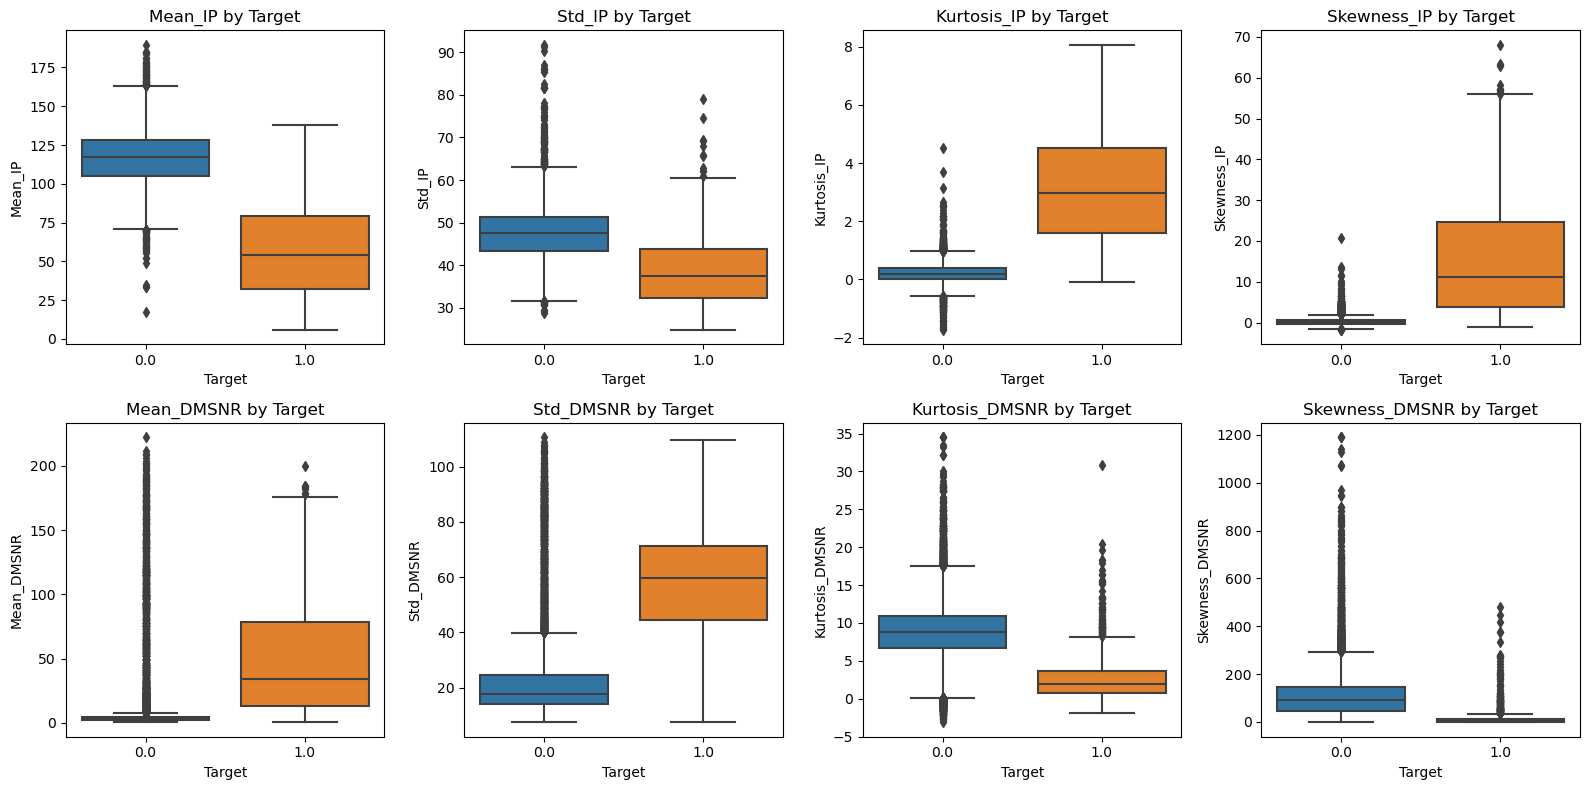

In [9]:
#Plotting Boxplot for all features
columns = [col for col in df.columns if col != 'Target']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
# Plotting boxplots for each column
for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    sns.boxplot(data=df,x='Target',y=column,ax=axes[row, col])
    axes[row, col].set_title(f'{column} by Target')
    axes[row, col].set_xlabel('Target')
    axes[row, col].set_ylabel(column)

plt.tight_layout()
plt.show()


- Almost every feature has outliers ,especially Non-Pulsar Star group features.
- Median is also varying for both classes.
- For treating the outliers ,we'll have to look each column seperately and decide.

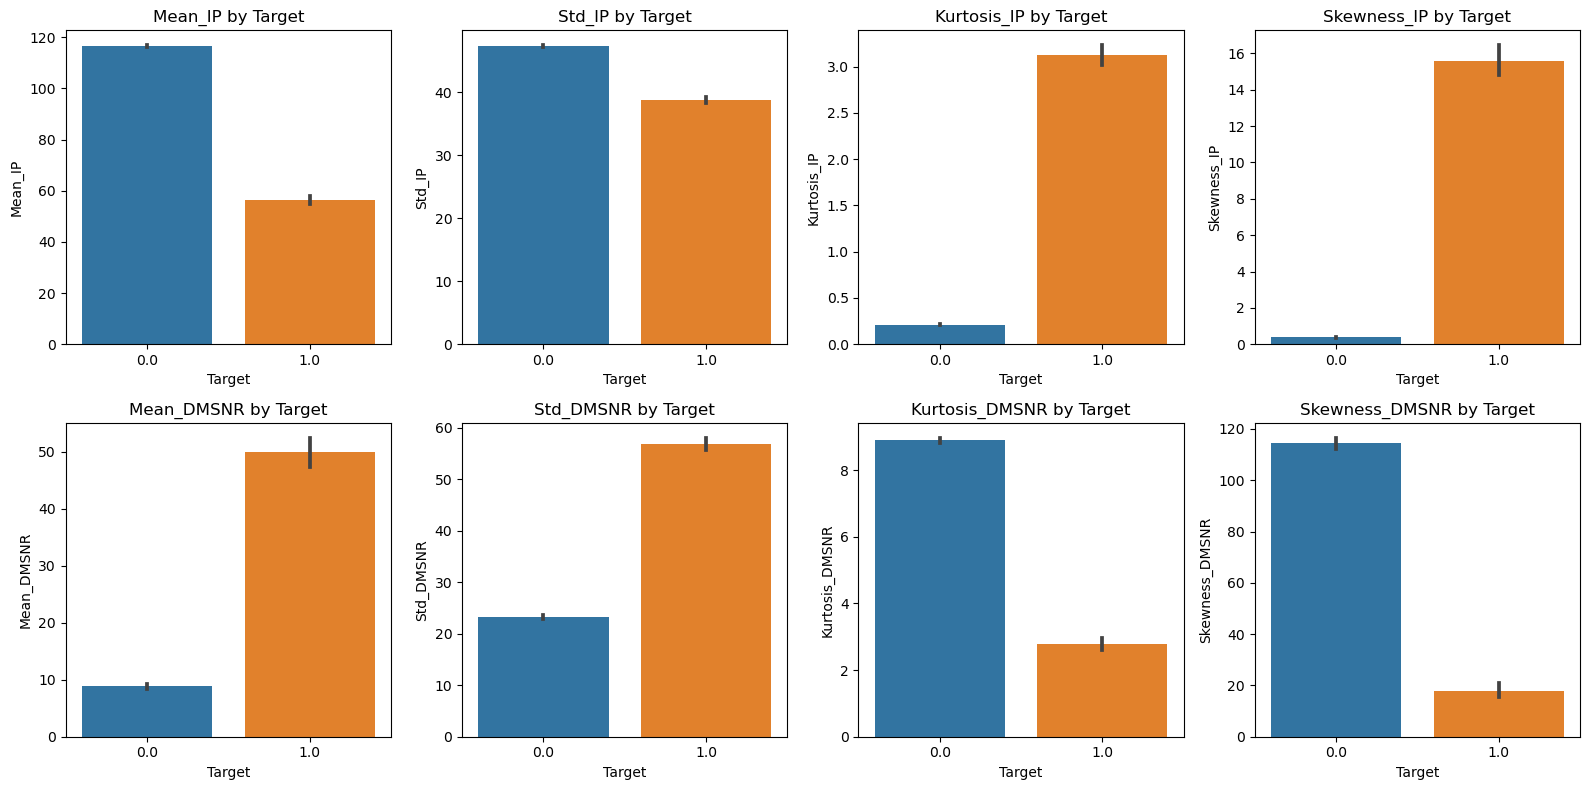

In [10]:
#Plotting Barplots for all features
columns = [col for col in df.columns if col != 'Target']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
# Plotting boxplots for each column
for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    sns.barplot(data=df,x='Target',y=column,ax=axes[row, col])
    axes[row, col].set_title(f'{column} by Target')
    axes[row, col].set_xlabel('Target')
    axes[row, col].set_ylabel(column)

plt.tight_layout()
plt.show()


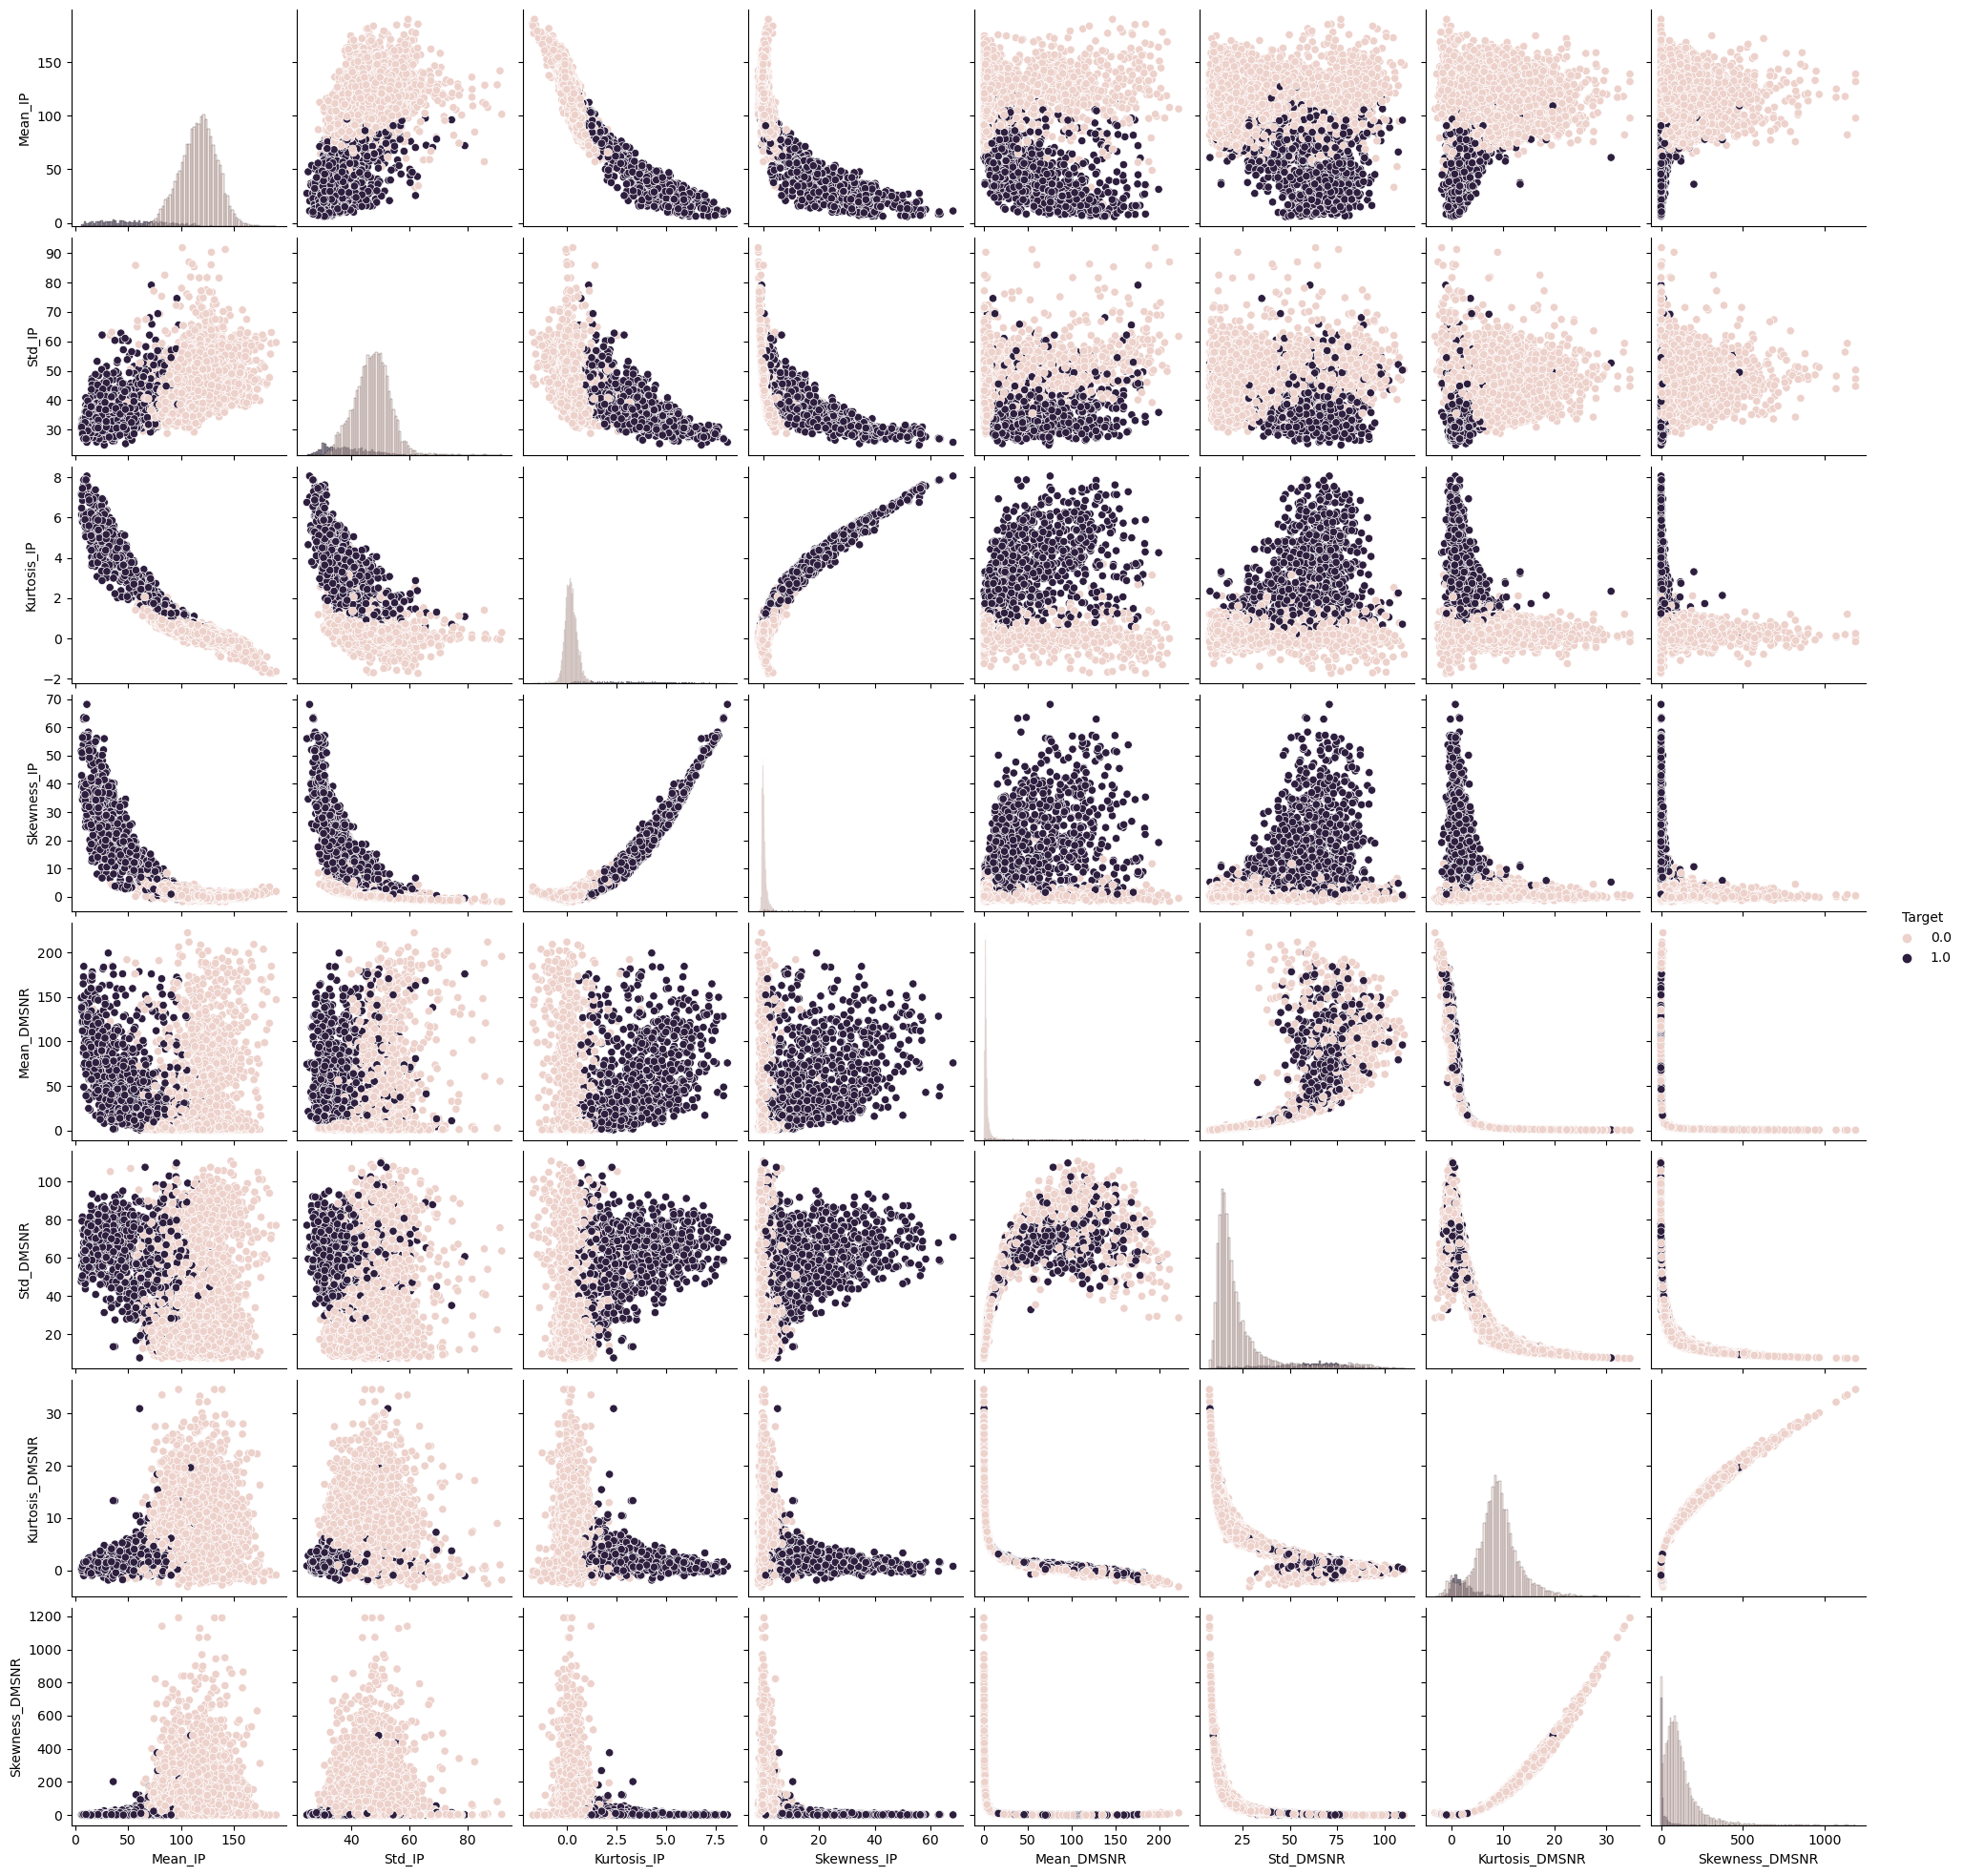

In [11]:
# Plotting a pairplot
sns.pairplot(df, hue='Target',diag_kind='hist')

**Observations:** 

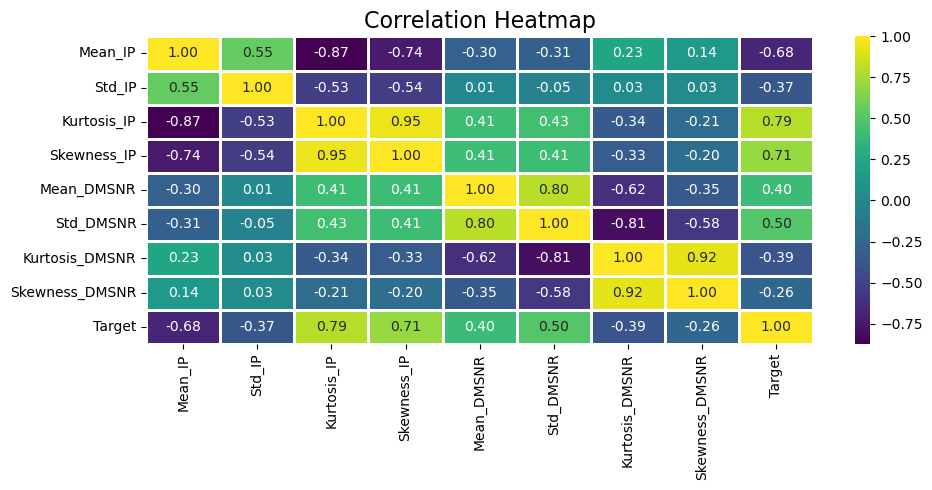

In [12]:
correlation_matrix = df.corr()

# Set up the figure
plt.figure(figsize=(10, 5))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=1)


plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

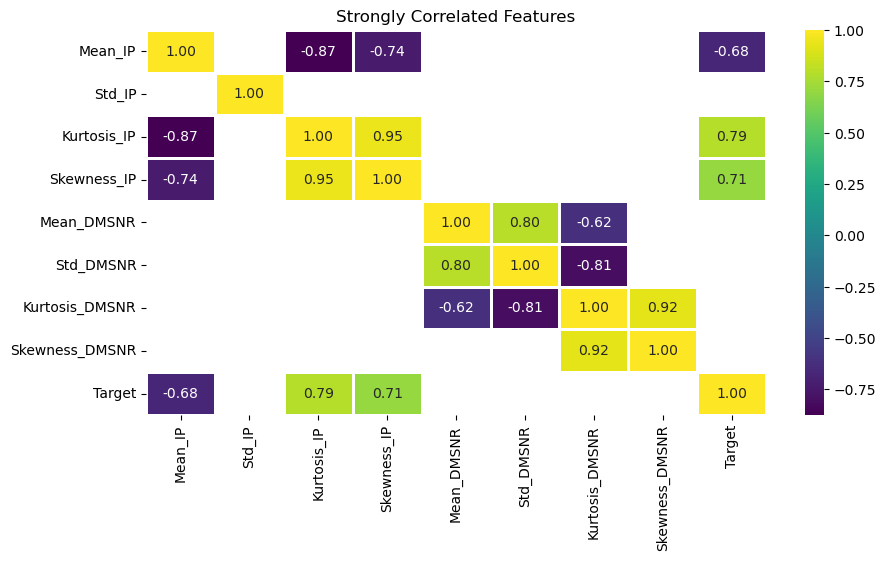

In [13]:
#Lets have a look on strongly correlated features
# Setting a threshold for strong correlation
threshold = 0.6

# Creating a mask to hide weaker correlations
mask = np.abs(correlation_matrix) < threshold
masked_corr_matrix = correlation_matrix.mask(mask)

# Plotting the heatmap with the masked correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(masked_corr_matrix, annot=True, cmap='viridis',fmt='.2f', linewidths=1)
plt.title('Strongly Correlated Features')
plt.show()


- As expected ,Target Class is showing strong correlation with Mean of Ip,Kurtosis of IP and Skewness of IP , but it is a CLassification so we can't rely on this.

### Treatment of Null Values:

In [14]:
# Saving the null data points in the target column
Null_df=df[df['Target'].isnull()]

In [15]:
#Dropping the rows containing null values in the target column
df.dropna(subset=['Target'], inplace=True)

- **Why did we drop the record ,which contains null values in the Target ??**
    - Target feature is our prediction , therefore imputing is not a good option for model reliability.
    -  Imputing missing values in the target variable can potentially introduce data leakage and bias into your model's predictions
    - Target values are usually dependent variables that we aim to predict. Imputing these values might mask underlying patterns or relationships between features and the target.
- **Why did we save those records ??**
    - We can use those records as Validation Data/Testing Data.(*though ,we have to take care of other feature's null value)

In [16]:
#For the features we'll use KNN imputer to fill null values 
imputer = KNNImputer()

# Perform imputation
df1 = imputer.fit_transform(df)
df1 = pd.DataFrame(df1, columns=df.columns)

df1.isnull().sum()

Mean_IP           0
Std_IP            0
Kurtosis_IP       0
Skewness_IP       0
Mean_DMSNR        0
Std_DMSNR         0
Kurtosis_DMSNR    0
Skewness_DMSNR    0
Target            0
dtype: int64

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mean_IP         12528 non-null  float64
 1   Std_IP          12528 non-null  float64
 2   Kurtosis_IP     12528 non-null  float64
 3   Skewness_IP     12528 non-null  float64
 4   Mean_DMSNR      12528 non-null  float64
 5   Std_DMSNR       12528 non-null  float64
 6   Kurtosis_DMSNR  12528 non-null  float64
 7   Skewness_DMSNR  12528 non-null  float64
 8   Target          12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [18]:
df1

,Mean_IP,Std_IP,Kurtosis_IP,Skewness_IP,Mean_DMSNR,Std_DMSNR,Kurtosis_DMSNR,Skewness_DMSNR,Target
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,51.439932,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,30.965862,5.732201,34.357282,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


### Treatment of Outliers:

- While plotting the boxplots for all the featured previously, we have noticed that there are varying distibution of datapoints and outliers.
- Since our focus is on Class 1 i.e Pulsar Stars , we'll cautiously treat the outliers so that we don't loose information regarding Pulsar Stars and also remove uneccessary data points and noise caused by Non-Pulsar Stars.
- To do this we'll study class wise outliers as well as overall outliers ,and will try to balance out.

In [19]:
#Creating a function to create boxplots
def plot_boxplot(dataframe, column):
    # Set a custom color palette
    custom_palette = ['#5f9ea0', '#ff7f50']
    sns.set_theme(style='darkgrid')

    # Create a figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot separated by 'Target' class
    sns.boxplot(data=dataframe, y=column, x='Target', ax=axes[0], palette=custom_palette)
    axes[0].set_title(f'{column} - Class Wise Distribution', fontsize=14)
    axes[0].set_xlabel('Target', fontsize=12)
    axes[0].set_ylabel(column, fontsize=12)
    axes[0].tick_params(labelsize=10)

    # Overall boxplot
    sns.boxplot(data=dataframe, y=column, ax=axes[1], palette=custom_palette)
    axes[1].set_title(f'{column} - Overall Distribution', fontsize=14)
    axes[1].set_xlabel('Overall', fontsize=12)
    axes[1].set_ylabel(column, fontsize=12)
    axes[1].tick_params(labelsize=10)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()





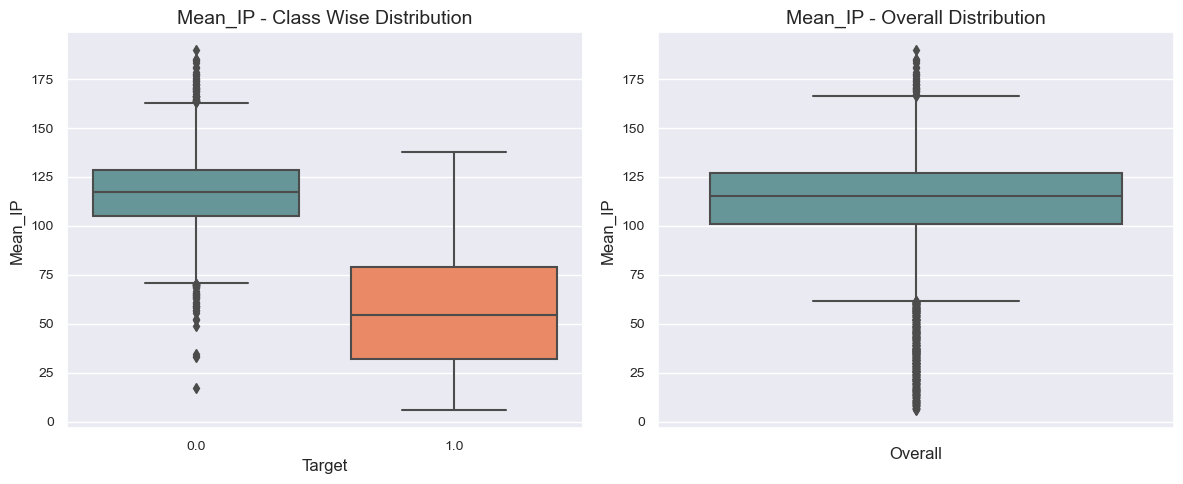

In [20]:
#Mean_IP 
plot_boxplot(df1, 'Mean_IP')

- Since Majority of datapoints of lower range is class 1 ,so we include them in the dataset,evn though they are outliers.
- Removing Upper Range Outliers will cause no harm ,so we'll remove them.


In [21]:
Q1 = df1['Mean_IP'].quantile(0.25)
Q3 = df1['Mean_IP'].quantile(0.75)
IQR = Q3 - Q1

ub=Q3 + (1.5 * IQR)
df2=df1[df1['Mean_IP']<ub]

In [22]:
df2['Target'].value_counts()

0.0    11343
1.0     1153
Name: Target, dtype: int64

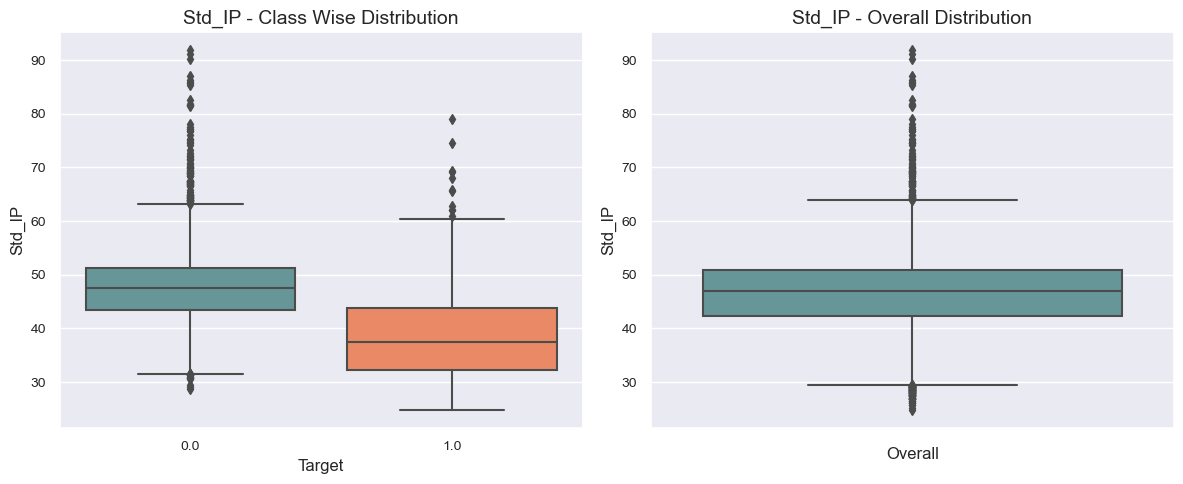

In [23]:
plot_boxplot(df2, 'Std_IP')

- Observing the boxplots , we can remove the upper range outliers.
- Will include lower range outlliers in the dataset as they might be important for Pulsar detection.

In [24]:
Q1 = df2['Std_IP'].quantile(0.25)
Q3 = df2['Std_IP'].quantile(0.75)
IQR = Q3 - Q1

ub=Q3 +(1.5 * IQR)
df3=df2[df2['Std_IP']<ub]

In [25]:
df3['Target'].value_counts()

0.0    11262
1.0     1146
Name: Target, dtype: int64

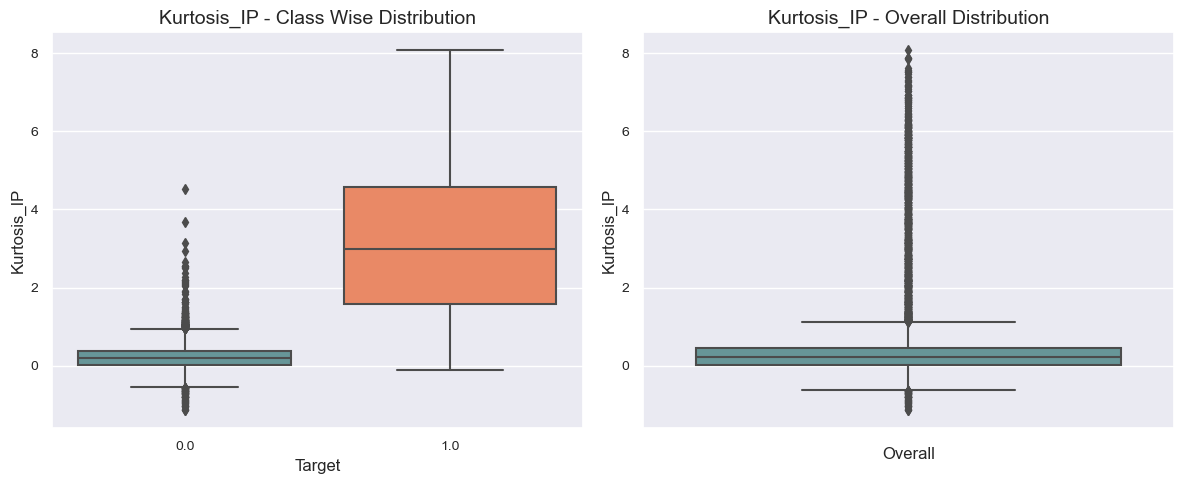

In [26]:
plot_boxplot(df3, 'Kurtosis_IP')

- For Kurtosis feature we'll remove the lower range outliers

In [27]:
Q1 = df3['Kurtosis_IP'].quantile(0.25)
Q3 = df3['Kurtosis_IP'].quantile(0.75)
IQR = Q3 - Q1

lb=Q1 -(1.5 * IQR)
df4=df3[df3['Kurtosis_IP']>lb]

In [28]:
df4['Target'].value_counts()

0.0    11219
1.0     1146
Name: Target, dtype: int64

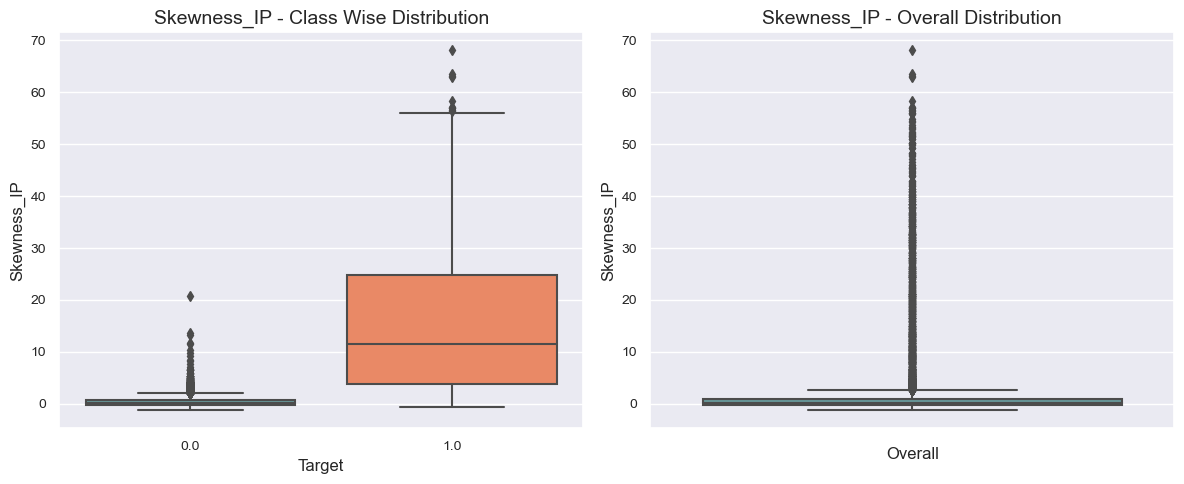

In [29]:
plot_boxplot(df4, 'Skewness_IP')

- Here we can not use the overall Q3 for ,upper range outliers as we might loose many Class 1 points.
- We'll use Class 1 Points for calculating Q3 of Skewness_IP and then will calculate upper boundary for removing outliers.

In [30]:
Q1 = df4[df4['Target']==1]['Skewness_IP'].quantile(0.25)
Q3 = df4[df4['Target']==1]['Skewness_IP'].quantile(0.75)
IQR = Q3 - Q1

ub=Q3 +(1.5 * IQR)
df5=df4[df4['Skewness_IP']<ub]

In [31]:
df5['Target'].value_counts()

0.0    11219
1.0     1136
Name: Target, dtype: int64

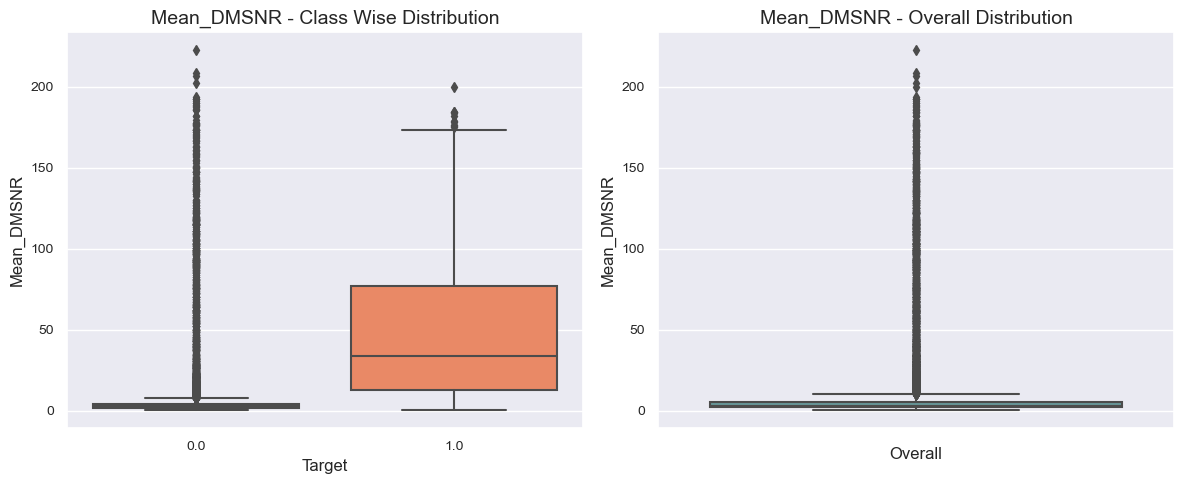

In [32]:
plot_boxplot(df5, 'Mean_DMSNR')

In [33]:
Q1 = df5[df5['Target']==1]['Mean_DMSNR'].quantile(0.25)
Q3 = df5[df5['Target']==1]['Mean_DMSNR'].quantile(0.75)
IQR = Q3 - Q1

ub=Q3 +(1.5 * IQR)
df6=df5[df5['Mean_DMSNR']<=ub]

In [34]:
df6['Target'].value_counts()

0.0    11192
1.0     1126
Name: Target, dtype: int64

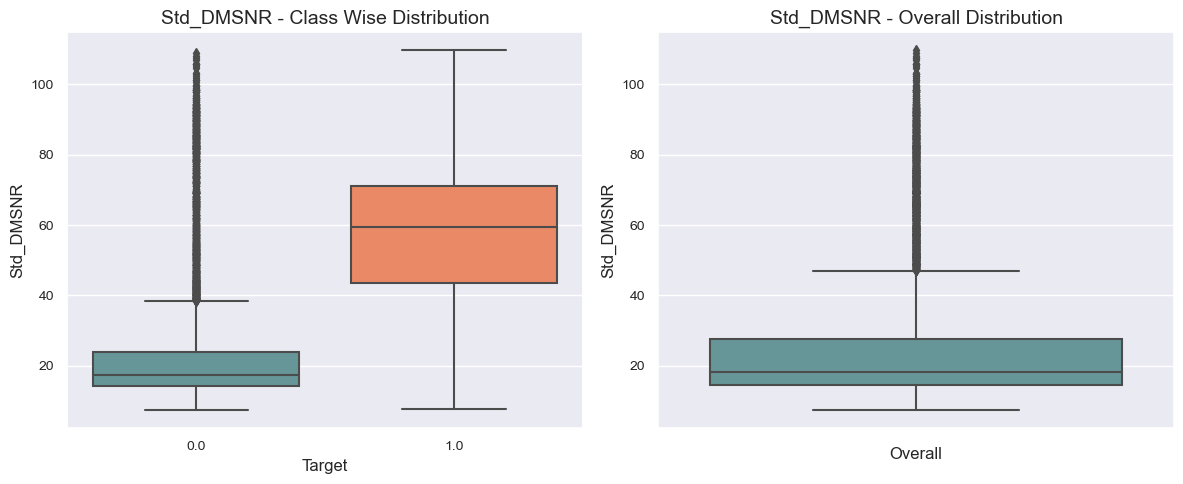

In [35]:
plot_boxplot(df6, 'Std_DMSNR')

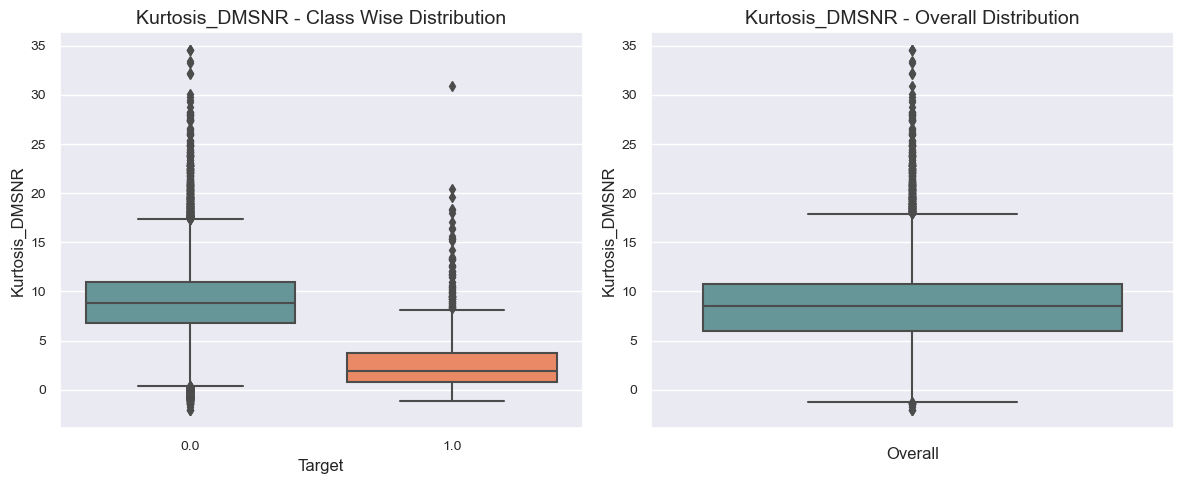

In [36]:
plot_boxplot(df6, 'Kurtosis_DMSNR')

In [37]:
Q1 = df6[df6['Target']==1]['Kurtosis_DMSNR'].quantile(0.25)
Q3 = df6[df6['Target']==1]['Kurtosis_DMSNR'].quantile(0.75)
IQR = Q3 - Q1

ub=Q3 +(1.5 * IQR)
df7=df6[df6['Kurtosis_DMSNR']<=ub]

In [38]:
df7['Target'].value_counts()

0.0    4578
1.0    1052
Name: Target, dtype: int64

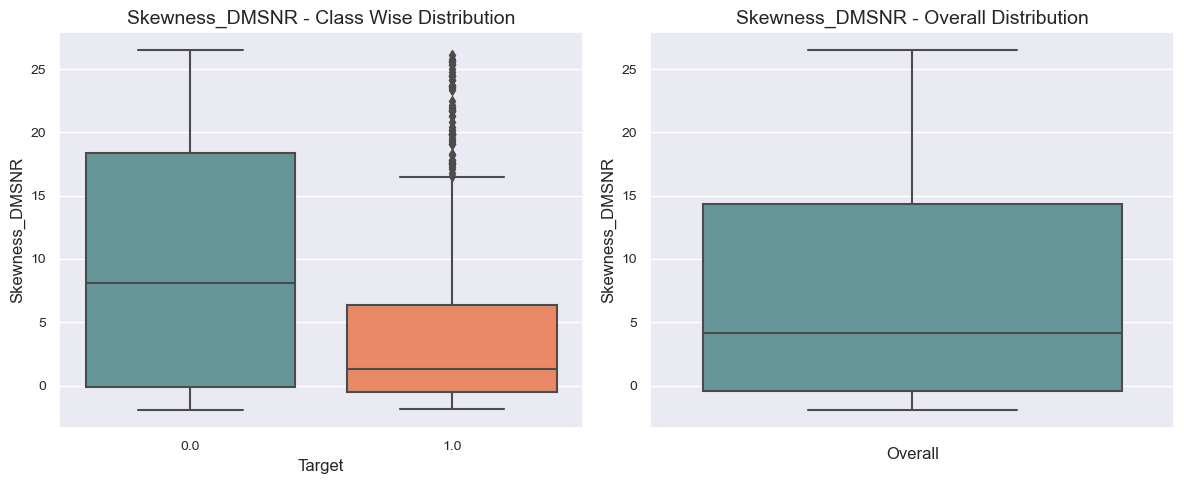

In [54]:
plot_boxplot(df8, 'Skewness_DMSNR')

In [45]:
Q1 = df7[df7['Target']==1]['Skewness_DMSNR'].quantile(0.25)
Q3 = df7[df7['Target']==1]['Skewness_DMSNR'].quantile(0.75)
IQR = Q3 - Q1

ub=Q3 +(1.5 * IQR)
df8=df7[df7['Skewness_DMSNR']<=ub]

In [46]:
df8['Target'].value_counts()

0.0    1528
1.0     940
Name: Target, dtype: int64

In [57]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 3 to 12523
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mean_IP         2468 non-null   float64
 1   Std_IP          2468 non-null   float64
 2   Kurtosis_IP     2468 non-null   float64
 3   Skewness_IP     2468 non-null   float64
 4   Mean_DMSNR      2468 non-null   float64
 5   Std_DMSNR       2468 non-null   float64
 6   Kurtosis_DMSNR  2468 non-null   float64
 7   Skewness_DMSNR  2468 non-null   float64
 8   Target          2468 non-null   float64
dtypes: float64(9)
memory usage: 192.8 KB


- Now most of the outliers have been treated , and for the remaining outliers we'll scale the data using **Robust Scaler**.
- No Null Values are present.
- Since after the outlier treatment ,data is not heavily imbalanced now.
- Even though we can still use some balancing technique to improve the model performance.

### SVM Model Creation:

In [58]:
# Splitting data into features and target variable
X = df8.drop('Target', axis=1)  # Features
y = df8['Target']  # Target variable


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# Using RobustScaler to scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       468
         1.0       0.96      0.90      0.93       273

    accuracy                           0.95       741
   macro avg       0.95      0.94      0.94       741
weighted avg       0.95      0.95      0.95       741



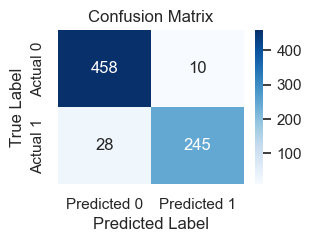

In [60]:
# Creating and training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       473
         1.0       0.97      0.91      0.94       444

    accuracy                           0.94       917
   macro avg       0.95      0.94      0.94       917
weighted avg       0.95      0.94      0.94       917



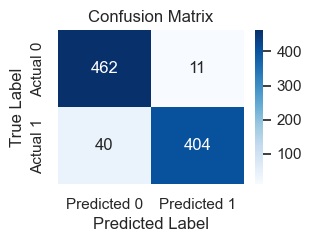

In [73]:
#Applying SMOTE technique to balance out the dataset to see if there is any improvement

smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Creating and training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Conclusion :

- With an overall accuracy of 94%, the model showcases a commendable performance in distinguishing between the classes.

- **Precision & Recall**: 
    - For class 0.0, the precision of 92% indicates that among the predicted instances of this class, 92% were correctly classified. The recall of 98% suggests that the model captured 98% of the actual instances of this class.

   - For class 1.0, the precision of 97% highlights the accuracy of the model in predicting instances of this class, while the recall of 91% demonstrates the model's ability to identify 91% of the actual instances of this class.
   
- **F1-score**: The F1-score, which considers both precision and recall, indicates a balanced measure of model performance. It reflects the harmonic mean of precision and recall for each class. The F1-score for class 0.0 is 95%, and for class 1.0, it stands at 94%.

- Support: With 473 instances for class 0.0 and 444 instances for class 1.0, the model’s predictions were based on a substantial number of instances for each class.

- Overall, the model demonstrates strong performance across both classes, as evidenced by high precision, recall, and F1-scores. These metrics collectively affirm the model’s ability to effectively classify instances while maintaining a high level of accuracy.

### What else can we do to improve the better classification of Class 1:

- Domain Knowledge: Incorporate domain expertise to identify crucial factors specific to class 1 and use this knowledge to refine the model or features.
- Investigate Misclassifications: Analyze instances where class 1 was misclassified. Understand patterns or specific characteristics that led to misclassification and try to address them through data preprocessing or feature engineering.
- Hyperparameter Tuning: Fine-tune hyperparameters specifically targeting the improved performance of class 1
     - Experiment with different parameters such as type of Kernel , C value ,gamma value etc.